# Homework 4 Assignment 4
## By: Yukun Wan / yw3447

    test if the distribution of 
    
    1) trip duration of bikers that ride during the day vs night
    
    2) age of bikers for trips originating in Manhattan and in Brooklyn
    
    are different. Use 3 tests: KS, Pearson's, Spearman's. 
    
    Use the scipy.stats functions scipy.stats.ks_2samp, scipy.stats.pearsonr, scipy.stats.spearmanr. 
    
    For the KS do the test with the entire dataset and with a subset 200 times smaller
    
    Choose a single significant threshold for the whole exercise. 
    
    For each test phrase the Null Hypothesis in words.
    
    Describe the return of the scipy function you use in each case.
    
    State the result in terms of rejection of the Null.

# For the whole exercise, significance level = 0.05

In [1]:
# my usual imports and setups
import pylab as pl
import pandas as pd
import numpy as np
import os
#imports downloader
from getCitiBikeCSV import getCitiBikeCSV
import scipy.stats

%pylab inline


#this makes my plots pretty! but it is totally not mandatory to do it
#import json
#s = json.load( open(os.getenv ('PUI2016')+"/fbb_matplotlibrc.json") )
#pl.rcParams.update(s)



Populating the interactive namespace from numpy and matplotlib


# Read in data
You are requested to use 2 months at least. It would be a good idea to use data from a colder and a warmer months, since there are more riders in the warm weather and ridership patterns may change with weather, temperature, etc. You should use data from multiple months, joining multiple datasets (thus addressing some systematic errors as well)



# 0. Sample 
# SPLIT BY CATEGORY

as an example I am splitting data by gender and looking at age or riders:

## H0: there is no statistical difference in the age distribution of male and female riders
$$ \alpha = 0.05 $$

extracting the age happens in the cell below

In [90]:
datestring = '201501'
getCitiBikeCSV(datestring)

('Downloading', '201501')
file in place, you can continue


In [91]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1


In [92]:
df['date'] = pd.to_datetime(df['starttime'])
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'date'],
      dtype='object')

In [93]:
#df is the dataframe where the content of the csv file is stored
df['ageM'] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
df['ageF'] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]

In [94]:
#dropping some data I no longer need
#... your code here...
df_KS = df.drop([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year',  u'date'],axis=1)
df_KS.head()

,gender,ageM,ageF
0,2,NaN,55.0
1,1,52.0,NaN
2,1,41.0,NaN
3,1,46.0,NaN
4,1,38.0,NaN


In [95]:
#your df should look something like this
# look at these data carefully... you may see someinteresting values!
df_KS.describe()

,gender,ageM,ageF
count,285552.000000,227764.000000,52093.000000
mean,1.162485,40.305272,38.951145
std,0.419490,11.595240,11.405112
min,0.000000,16.000000,17.000000
25%,1.000000,31.000000,30.000000
50%,1.000000,39.000000,37.000000
75%,1.000000,48.000000,48.000000
max,2.000000,116.000000,89.000000


In [96]:
# dropping NaN values
df_KS['ageM'].dropna(inplace= True)
df_KS['ageF'].dropna(inplace= True)

lets split age in 10 year bins. the dataset is very large, so i could be split in smaller bins, but I will chose 10 years in the interest of time. 
the bin size choice should be a balance between properly sample the age space, have enough counts in each bin that the statistical noise is not significant (remember that is > sqrt(N)!) and the computational requirement to computatinal facilities ratio. 

the next several steps are needed if you want to code up the KS test from scratch. that is for extra credit, so if you do not want to do it you may not need to plot split the distribution in bins and create the cumulative HOWEVER it is a great idea to do it anyways to explore your data viaually! remember Ascombe's quartet!!

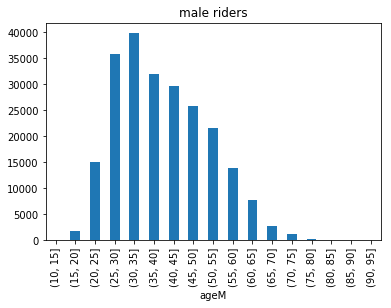

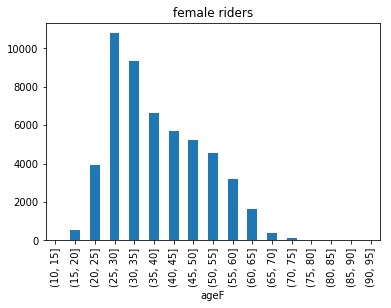

In [97]:
# plotting histogramswith pandas is a bit different than with pylab
# this is a VERY USEFUL syntaxfor you to knonw!
bins = np.arange(10, 99, 5)
axM = df_KS.ageM.groupby(pd.cut(df_KS.ageM, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axM.set_title("male riders")
axF = df_KS.ageF.groupby(pd.cut(df_KS.ageF, bins)).agg([count_nonzero]).plot(kind='bar',
                                                                legend=False)
axF.set_title("female riders");


**Figure 1: histogrammed distribution of riders' ages by gender **
here is where you should have a nice caption that describes what I am looking at, why I am looking at it, and what I should notice

this is how the cumulative distributions look like.  Notice that i am normalizing them! if i want to reat an observed distribution like a probablility distribution i have to normalize it

          count_nonzero
ageM                   
(10, 15]            NaN
(15, 20]       0.001657
(20, 25]       0.010955
(25, 30]       0.060955
(30, 35]       0.065548
(35, 40]       0.052146
(40, 45]       0.031750
(45, 50]       0.018657
(50, 55]       0.011015
(55, 60]       0.010957
(60, 65]       0.008149
(65, 70]       0.003203
(70, 75]       0.000663
(75, 80]       0.000188
(80, 85]       0.000002
(85, 90]            NaN
(90, 95]            NaN


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in sqrt
  # This is added back by InteractiveShellApp.init_path()


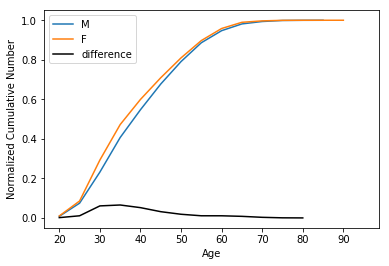

In [98]:
#print df.ageS, df.ageS.cumsum()

csM=df_KS.ageM.groupby(pd.cut(df_KS.ageM, bins)).agg([count_nonzero]).cumsum()

csF=df_KS.ageF.groupby(pd.cut(df_KS.ageF, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csM / csM.max()-csF / csF.max()))

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.plot(bins[:-1] + 5, np.sqrt(csF / csF.max() - csM / csM.max())**2, 'k-',
        label = "difference")
pl.xlabel("Age")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

** Figure 2: the cumulative distribution of CitiBike riders' ages by gender** ... [a good caption here]

They look similar! But the difference gets to 10%. If I wanted to code the KS test by hand I woud have everything I need: the normalized cumulative distributions can be subtracted from each other and the max distance can calculated. 

Notice that there may be NaN values you are gonna have to deal with! 
You can do that for example with a Boolean statementsuch as  df.ageF[~np.isnan(df.ageF)] or you can use numpy functions that deal with Nan values: nansum, nanmean, nanstd...

lets run the scipy KS test

In [99]:
#import scipy.stats
#remember that your imports should all be at the top. I leave it here to hightlight that this package is needed at this point of the workflow

# 0.1 KS tests to compare 2 samples

http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ks_2samp.html

the KS test in scipy returns the p-value BUT make sure you understand what the NULL is! read the documentation carefully! what is the null hypothesis that you can/cannot reject?

In [100]:
ks = scipy.stats.ks_2samp(df_KS.ageM, df_KS.ageF)
print (ks)

(0.067442557802207204, 4.0408611999082294e-168)


**  FILL IN THE CELL BELOW!**

##### your words here!...
##### this cell is for you to tell me what the scipy KS test returned and what it means in terms of NULL HYPOTHESIS
##### to do that refer to the scipy documentation to understand the output of the scipy.stats.ks_2samp function


### KS statistic = 0.06744
### p-value = 4.0408611999082294e-168
### We can reject the null hypothesis since the p-value is less than critical value 0.05.


The scipy.stats KS test already tells me the significance and the p-value. 

The next few cells are here just to show you how you would obtain the same result by hand, but they are **not required**. 

Remember: the Null hypothesis is rejected if 

$D_KS(n1,n2) > c(\alpha) \sqrt{\frac{(n1 + n2)}{n1n2}}$

(see class notes) where $c(\alpha$) is the inverse of the KS distribution, and you do not have to know how to get that cause there are tables that list critical values!! 

http://www.real-statistics.com/tests-normality-and-symmetry/statistical-tests-normality-symmetry/kolmogorov-smirnov-test/kolmogorov-distribution/

But also this result depends in your choice of binning through, and thustheresultyou get by hand may not be exactly the same as the one the KS returns. Either way: this is how you would calculate the KS statistics by hand.

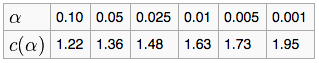

In [101]:
#here is the critical values tablel. Have you chosen your significance level yet?? you should do it first thing!
from IPython.display import Image
Image("https://raw.githubusercontent.com/fedhere/PUI2017_fb55/master/plotsforclasses/ks2sample_table.png")

## 0.2 Redo the KS test with reducted dataset  (a subset 200 times smaller)

In [102]:
## your words here!...
## this cell is for you to redo the test with reducted dataset 
## and tell me what the scipy ks test returned and what it means in terms of NULL HYPOTHESIS

df_KS_sub = df_KS.sample(n=int(len(df_KS)/200),random_state=500)

len(df_KS_sub)

1427

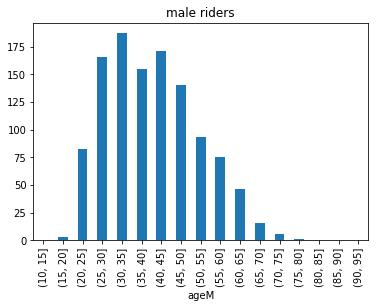

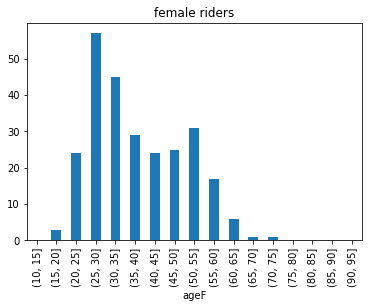

In [103]:
bins = np.arange(10, 99, 5)
axM = df_KS_sub.ageM.groupby(pd.cut(df_KS_sub.ageM, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axM.set_title("male riders")
axF = df_KS_sub.ageF.groupby(pd.cut(df_KS_sub.ageF, bins)).agg([count_nonzero]).plot(kind='bar',
                                                                legend=False)
axF.set_title("female riders");

**Figure 3: histogrammed distribution of riders' ages by gender for sample (200 times smaller than dataset)**

          count_nonzero
ageM                   
(10, 15]            NaN
(15, 20]       0.008780
(20, 25]       0.027355
(25, 30]       0.098726
(30, 35]       0.106081
(35, 40]       0.080620
(40, 45]       0.022138
(45, 50]       0.005397
(50, 55]       0.031038
(55, 60]       0.030002
(60, 65]       0.012536
(65, 70]       0.002327
(70, 75]       0.000876
(75, 80]            NaN
(80, 85]            NaN
(85, 90]            NaN
(90, 95]            NaN


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in sqrt
  # This is added back by InteractiveShellApp.init_path()


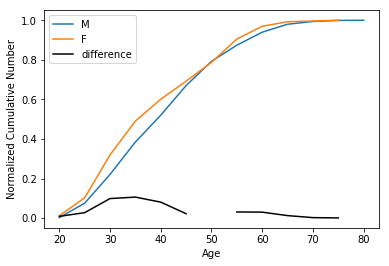

In [104]:
#print df.ageS, df.ageS.cumsum()

csM=df_KS_sub.ageM.groupby(pd.cut(df_KS_sub.ageM, bins)).agg([count_nonzero]).cumsum()

csF=df_KS_sub.ageF.groupby(pd.cut(df_KS_sub.ageF, bins)).agg([count_nonzero]).cumsum() 

print (np.abs(csM / csM.max()-csF / csF.max()))

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.plot(bins[:-1] + 5, np.sqrt(csF / csF.max() - csM / csM.max())**2, 'k-',
        label = "difference")
pl.xlabel("Age")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

** Figure 4: the cumulative distribution of CitiBike riders' ages by gender for sample (200 times smaller than dataset)**

In [105]:
ks_sub = scipy.stats.ks_2samp(df_KS_sub.ageM, df_KS_sub.ageF)
print (ks_sub)

(0.61667834618079886, 2.6551461993867189e-238)


### Discussion:
KS statistic = 0.6167

p-value = 2.6551461993867189e-238

We can reject the null hypothesis since the p-value is less than critical value 0.05

# Now retest using a test for correlation. 

That will answer a slightly different question though - formulate the NULL appropriately. The tests for correlations (generally) requires the variable to be paired, so that I can tell if x changes does y change similarly. But the datasets are of different size! You will need to reduce them to the same size. You can do that by subsampling of the data: take only 1 ride every of 200, which you can achieve "slicing and broadcasting" the array or using one of the python function (built in python numpy.random.choice() functions for example: Docstring:
choice(a, size=None, replace=True, p=None)

Generates a random sample from a given 1-D array

        .. versionadded:: 1.7.0

Parameters
...

But make sure you understand how to use it! there is an option "replace" which you should think about.

In [106]:
df_sub_m = np.random.choice(df_KS['ageM'].dropna(),size=df_KS['ageF'].count())
df_sub_f = df_KS['ageF'].dropna()

df_sub = pd.DataFrame([df_sub_m,df_sub_f]).T
df_sub.columns = ['Male','Female']

df_sub['Male'] = df_sub['Male'].sort_values().values
df_sub['Female'] = df_sub['Female'].sort_values().values

df_sub.head()

,Male,Female
0,16.0,17.0
1,16.0,17.0
2,16.0,17.0
3,16.0,17.0
4,16.0,17.0


# 0.2 Pearson's  test for correlation

** notice that the Pearson's is a pairwise test: the samples need to be **
 a. the same size
 b. sorted! (how??)
    
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr



In [107]:
# your code here!
# wrangle the data as needed
# please perform the Pearson's test 
# and tell me what you find in terms of NULL hypothesis

pr = scipy.stats.pearsonr(df_sub.Male,df_sub.Female)
print(pr)

(0.99511417193842511, 0.0)


### Discussion:
Pearson’s correlation coefficient = 0.99511

p-value = 0.0

We can reject the null hypothesis since the p value is below 0.05

## 0.3 Spearman's  test for correlation

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr

In [108]:
# your code here!
# wrangle the data as needed
# please perform the Spearman's test and tell me what you find in terms of NULL hypothesis

sp = scipy.stats.spearmanr(df_sub.Male,df_sub.Female)
print(sp)


(0.99914026955447133, 0.0)


### Discussion:
Spearman’s correlation coefficient = 0.9991

p-value = 0.0

We can reject the null hypothesis since the p value is below 0.05

# Choose 201601 and 201607 as Sample for next two tests

In [2]:
def download(datestring):
    #getCitiBikeCSV(datestring)
    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
    ###  To move it I use the os.system() functions to run bash commands with arguments
    os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
    ### unzip the csv 
    os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")

In [4]:
download('201502')
download('201506')

dfA = pd.read_csv(os.getenv("PUIDATA") + "/201502-citibike-tripdata.zip")
dfB = pd.read_csv(os.getenv("PUIDATA") + "/201506-citibike-tripdata.zip")

In [5]:
dfA['date'] = pd.to_datetime(dfA['starttime'])

In [7]:
dfB['date'] = pd.to_datetime(dfB['starttime'])

In [8]:
dfC = pd.concat([dfA,dfB],ignore_index=True)

# Test 1. trip duration of bikers that ride during the day vs night

### H0: there is no statistical difference in the trip duration distribution of bikers that ride during the day (7 am to 7pm) vs night (0 am to 6 am and 8 pm to 11 pm)

α=0.05


## Split by category
I split data by day time (7 am to 7pm) and night time (7 pm to  7 am)

In [109]:
dfC.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'date', u'age', u'Borough',
       u'ageMN', u'ageBK'],
      dtype='object')

In [110]:
dfC.groupby(df['date'].dt.hour).size()

date
0.0      2428
1.0      1439
2.0       979
3.0       606
4.0       664
5.0      2269
6.0      8126
7.0     14898
8.0     25109
9.0     19373
10.0    12519
11.0    12589
12.0    14598
13.0    15340
14.0    16134
15.0    16961
16.0    20573
17.0    28028
18.0    26426
19.0    17544
20.0    11258
21.0     7613
22.0     6102
23.0     3976
dtype: int64

In [111]:
df1 = dfC

# Transform trip duration from second to minutes
df1['tripD'] = df1['tripduration'][(df1['date'].dt.hour >= 7) & (df1['date'].dt.hour < 19)] / 60
df1['tripN'] = df1['tripduration'][(df1['date'].dt.hour < 7) | (df1['date'].dt.hour >= 19)] / 60

In [112]:
df1.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,usertype,birth year,gender,date,age,Borough,ageMN,ageBK,tripD,tripN
0,801,2/1/2015 0:00,2/1/2015 0:14,521,8 Ave & W 31 St,40.750450,-73.994811,423,W 54 St & 9 Ave,40.765849,...,Subscriber,1978.0,2,2015-02-01 00:00:00,37.0,,NaN,NaN,NaN,13.350000
1,379,2/1/2015 0:00,2/1/2015 0:07,497,E 17 St & Broadway,40.737050,-73.990093,504,1 Ave & E 15 St,40.732219,...,Subscriber,1993.0,1,2015-02-01 00:00:00,22.0,,NaN,NaN,NaN,6.316667
2,2474,2/1/2015 0:01,2/1/2015 0:42,281,Grand Army Plaza & Central Park S,40.764397,-73.973715,127,Barrow St & Hudson St,40.731724,...,Subscriber,1969.0,2,2015-02-01 00:01:00,46.0,,NaN,NaN,NaN,41.233333
3,818,2/1/2015 0:01,2/1/2015 0:15,2004,6 Ave & Broome St,40.724399,-74.004704,505,6 Ave & W 33 St,40.749013,...,Subscriber,1985.0,2,2015-02-01 00:01:00,30.0,,NaN,NaN,NaN,13.633333
4,544,2/1/2015 0:01,2/1/2015 0:10,323,Lawrence St & Willoughby St,40.692362,-73.986317,83,Atlantic Ave & Fort Greene Pl,40.683826,...,Subscriber,1957.0,1,2015-02-01 00:01:00,58.0,,NaN,NaN,NaN,9.066667


In [113]:
df1.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'date', u'age', u'Borough',
       u'ageMN', u'ageBK', u'tripD', u'tripN'],
      dtype='object')

In [114]:
df1 = df1.drop([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'date', 
       ],axis=1)
df1.head()

,age,Borough,ageMN,ageBK,tripD,tripN
0,37.0,,NaN,NaN,NaN,13.350000
1,22.0,,NaN,NaN,NaN,6.316667
2,46.0,,NaN,NaN,NaN,41.233333
3,30.0,,NaN,NaN,NaN,13.633333
4,58.0,,NaN,NaN,NaN,9.066667


In [115]:
df1.describe()

,age,ageMN,ageBK,tripD,tripN
count,1.005490e+06,91513.000000,14762.00000,867148.000000,271001.000000
mean,3.893109e+01,39.270049,36.96010,14.483891,13.882588
std,1.152418e+01,11.984988,9.53813,55.548634,41.861747
min,1.600000e+01,16.000000,16.00000,1.000000,1.000000
25%,3.000000e+01,30.000000,30.00000,6.516667,6.266667
50%,3.700000e+01,37.000000,35.00000,10.333333,10.033333
75%,4.700000e+01,48.000000,43.00000,16.900000,16.450000
max,1.300000e+02,116.000000,115.00000,28197.883333,8504.100000


In [116]:
df1.dropna(how='all',inplace= True)

In [117]:
df1.describe()

,age,ageMN,ageBK,tripD,tripN
count,1.005490e+06,91513.000000,14762.00000,867148.000000,271001.000000
mean,3.893109e+01,39.270049,36.96010,14.483891,13.882588
std,1.152418e+01,11.984988,9.53813,55.548634,41.861747
min,1.600000e+01,16.000000,16.00000,1.000000,1.000000
25%,3.000000e+01,30.000000,30.00000,6.516667,6.266667
50%,3.700000e+01,37.000000,35.00000,10.333333,10.033333
75%,4.700000e+01,48.000000,43.00000,16.900000,16.450000
max,1.300000e+02,116.000000,115.00000,28197.883333,8504.100000


## Plot distribution

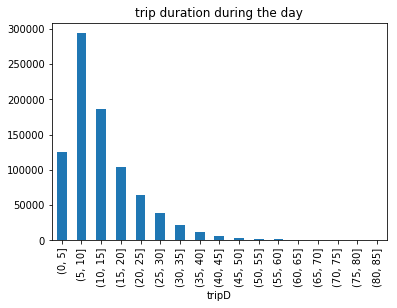

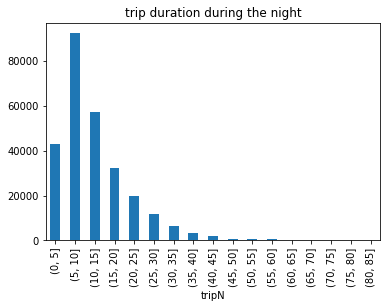

In [118]:
# plotting histogramswith pandas is a bit different than with pylab
# this is a VERY USEFUL syntaxfor you to knonw!
bins = np.arange(0,90,5)
axD = df1.tripD.groupby(pd.cut(df1.tripD, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axD.set_title("trip duration during the day")
axN = df1.tripN.groupby(pd.cut(df1.tripN, bins)).agg([count_nonzero]).plot(kind='bar',
                                                                legend=False)
axN.set_title("trip duration during the night");

### Figure 5: histogrammed distribution of riders' trip durations by daytime/nighttime
The histograms are cut into 5-minute bins for trips under an hour. Due to the free time limit, most bike trips seem to end before 45 minutes. 

          count_nonzero
tripD                  
(0, 5]         0.014260
(5, 10]        0.015334
(10, 15]       0.011074
(15, 20]       0.009607
(20, 25]       0.008002
(25, 30]       0.005911
(30, 35]       0.004606
(35, 40]       0.003473
(40, 45]       0.002947
(45, 50]       0.002272
(50, 55]       0.002014
(55, 60]       0.001686
(60, 65]       0.001271
(65, 70]       0.000970
(70, 75]       0.000564
(75, 80]       0.000211
(80, 85]       0.000000


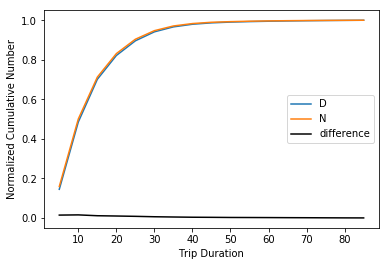

In [129]:
#print df.ageS, df.ageS.cumsum()

csD=df1.tripD.groupby(pd.cut(df1.tripD, bins)).agg([count_nonzero]).cumsum()

csN=df1.tripN.groupby(pd.cut(df1.tripN, bins)).agg([count_nonzero]).cumsum() 

print (np.abs(csD / csD.max()-csN / csN.max()))

pl.plot(bins[:-1] + 5, csD / csD.max(), label = "D")
pl.plot(bins[:-1] + 5, csN / csN.max(), label = "N")
pl.plot(bins[:-1] + 5, np.sqrt(csN / csN.max() - csD / csD.max())**2, 'k-',
        label = "difference")
pl.xlabel("Trip Duration")
pl.ylabel("Normalized Cumulative Number")
pl.legend() 

### Figure 6: the cumulative distribution of CitiBike riders' trip durations by trip start time
There seems to be only a slight difference between the two cumulative distributions. 

## 1.1 K-S test

In [120]:
ks = scipy.stats.ks_2samp(df1.tripD, df1.tripN)
print (ks)

(0.52378642866619396, 0.0)


### Discussion:

statistic = 0.5238

p-value = 0.0

Result: We can reject the null hypothesis since the p-value is below critical value 0.05.

## 1.2 Redo the KS test with reducted dataset (a subset 200 times smaller)

In [121]:
df1_sub = df1.sample(n=int(len(df1)/200),random_state=500)
len(df1_sub)

5690

In [122]:
ks_sub = scipy.stats.ks_2samp(df1_sub.tripD, df1_sub.tripN)
print (ks_sub)

(0.52759226713532514, 0.0)


### Discussion:
KS statistic = 0.5276

p-value = 0.0

We can reject the null hypothesis since the p-value is below 0.05.




### ===Retest using a test for correlation.===

### Null Hypothesis: There is no correlation between daytime trip duration and nighttime trip duration

### Significance Level: $\alpha = 0.05$

### Subsampling the data:

In [123]:
np.random.seed(500)

df1_sub_d = np.random.choice(df1['tripD'].dropna(),size=df1['tripN'].count())
df1_sub_n = df1['tripN'].dropna()

df1_sub = pd.DataFrame([df1_sub_d,df1_sub_n]).T

df1_sub.columns = ['TripDay','TripNight']

df1_sub['TripDay'] = df1_sub['TripDay'].sort_values().values
df1_sub['TripNight'] = df1_sub['TripNight'].sort_values().values

df1_sub.head()

,TripDay,TripNight
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0


In [124]:
df1_sub.describe()

,TripDay,TripNight
count,271001.000000,271001.000000
mean,14.746934,13.882588
std,77.624309,41.861747
min,1.000000,1.000000
25%,6.500000,6.266667
50%,10.350000,10.033333
75%,16.983333,16.450000
max,28197.883333,8504.100000


## 2.3 Pearson's test

In [125]:
pr = scipy.stats.pearsonr(df1_sub.TripDay,df1_sub.TripNight)
print(pr)

(0.8924667082507497, 0.0)


### Discussion:

Pearson's correlation coefficient = 0.8925

the p-value = 0.0

Result: The null hypothesis is rejected because the p-value is less than 0.05.



## 2.4 Spearman's test 

In [127]:
sr = scipy.stats.spearmanr(df1_sub.TripDay, df1_sub.TripNight)
print(sr)

(0.99999933283798148, 0.0)


### Discussion:

Spearman's correlation coefficient = 0.99999933283798148

the p-value = 0.0

Result: The null hypothesis is rejected because the p-value is less than 0.05.

# Test 2: age of bikers for trips originating in Manhattan and in Brooklyn

## Use ArcGIS to map PLUTO shape file with Citibike data and identfy the start borough for each ride
## see PLUTO file in BK.csv and MN.csv

In [66]:
df2 = dfC
df2.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,age,Borough,ageMN,ageBK
0,801,2/1/2015 0:00,2/1/2015 0:14,521,8 Ave & W 31 St,40.750450,-73.994811,423,W 54 St & 9 Ave,40.765849,-73.986905,17131,Subscriber,1978.0,2,2015-02-01 00:00:00,37.0,,NaN,NaN
1,379,2/1/2015 0:00,2/1/2015 0:07,497,E 17 St & Broadway,40.737050,-73.990093,504,1 Ave & E 15 St,40.732219,-73.981656,21289,Subscriber,1993.0,1,2015-02-01 00:00:00,22.0,,NaN,NaN
2,2474,2/1/2015 0:01,2/1/2015 0:42,281,Grand Army Plaza & Central Park S,40.764397,-73.973715,127,Barrow St & Hudson St,40.731724,-74.006744,18903,Subscriber,1969.0,2,2015-02-01 00:01:00,46.0,,NaN,NaN
3,818,2/1/2015 0:01,2/1/2015 0:15,2004,6 Ave & Broome St,40.724399,-74.004704,505,6 Ave & W 33 St,40.749013,-73.988484,21044,Subscriber,1985.0,2,2015-02-01 00:01:00,30.0,,NaN,NaN
4,544,2/1/2015 0:01,2/1/2015 0:10,323,Lawrence St & Willoughby St,40.692362,-73.986317,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,19868,Subscriber,1957.0,1,2015-02-01 00:01:00,58.0,,NaN,NaN


In [53]:
df2.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'date', u'age'],
      dtype='object')

In [54]:
MN = pd.read_csv('MN.csv')

In [55]:
BK = pd.read_csv('BK.csv')

In [67]:
df2['Borough'] = ''

In [68]:
df2.loc[df2.iloc[BK.OID,:].index,'Borough'] = 'BK'

In [69]:
df2.loc[df2.iloc[MN.OID,:].index,'Borough'] = 'MN'

In [70]:
df2.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,age,Borough,ageMN,ageBK
0,801,2/1/2015 0:00,2/1/2015 0:14,521,8 Ave & W 31 St,40.750450,-73.994811,423,W 54 St & 9 Ave,40.765849,-73.986905,17131,Subscriber,1978.0,2,2015-02-01 00:00:00,37.0,,NaN,NaN
1,379,2/1/2015 0:00,2/1/2015 0:07,497,E 17 St & Broadway,40.737050,-73.990093,504,1 Ave & E 15 St,40.732219,-73.981656,21289,Subscriber,1993.0,1,2015-02-01 00:00:00,22.0,,NaN,NaN
2,2474,2/1/2015 0:01,2/1/2015 0:42,281,Grand Army Plaza & Central Park S,40.764397,-73.973715,127,Barrow St & Hudson St,40.731724,-74.006744,18903,Subscriber,1969.0,2,2015-02-01 00:01:00,46.0,,NaN,NaN
3,818,2/1/2015 0:01,2/1/2015 0:15,2004,6 Ave & Broome St,40.724399,-74.004704,505,6 Ave & W 33 St,40.749013,-73.988484,21044,Subscriber,1985.0,2,2015-02-01 00:01:00,30.0,,NaN,NaN
4,544,2/1/2015 0:01,2/1/2015 0:10,323,Lawrence St & Willoughby St,40.692362,-73.986317,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,19868,Subscriber,1957.0,1,2015-02-01 00:01:00,58.0,,NaN,NaN


In [71]:
df2['ageMN'] = df2['age'][df2['Borough'] == 'MN']
df2['ageBK'] = df2['age'][df2['Borough'] == 'BK']

In [61]:
df2.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'date', u'age', u'Borough',
       u'ageMN', u'ageBK'],
      dtype='object')

In [72]:
df2 = df2.drop([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'date', u'age',u'Borough'],axis=1)

In [73]:
df2.head()

,ageMN,ageBK
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


In [74]:
df2.dropna(how='all',inplace= True)

In [75]:
df2.head()

,ageMN,ageBK
5,NaN,36.0
8,30.0,NaN
19,55.0,NaN
45,61.0,NaN
52,NaN,23.0


## Ploting distribution

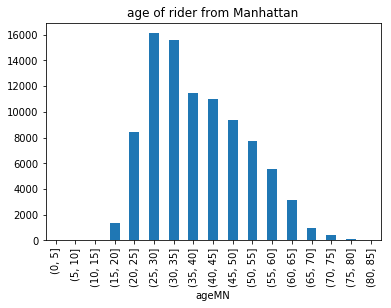

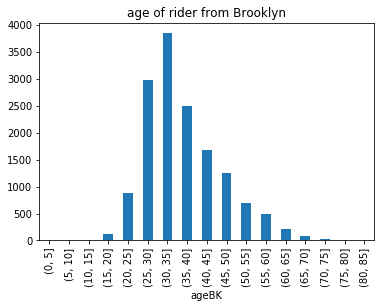

In [128]:
bins = np.arange(0,90,5)
axM = df2.ageMN.groupby(pd.cut(df2.ageMN, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axM.set_title("age of rider from Manhattan")
axB = df2.ageBK.groupby(pd.cut(df2.ageBK, bins)).agg([count_nonzero]).plot(kind='bar',
                                                                legend=False)
axB.set_title("age of rider from Brooklyn");

### Figure 7: histogrammed distribution of riders' age by start borough


          count_nonzero
ageMN                  
(0, 5]              NaN
(5, 10]             NaN
(10, 15]            NaN
(15, 20]       0.006570
(20, 25]       0.039811
(25, 30]       0.013400
(30, 35]       0.076861
(35, 40]       0.120524
(40, 45]       0.114704
(45, 50]       0.096721
(50, 55]       0.058859
(55, 60]       0.030764
(60, 65]       0.010024
(65, 70]       0.004790
(70, 75]       0.002107
(75, 80]       0.000623
(80, 85]            NaN


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':


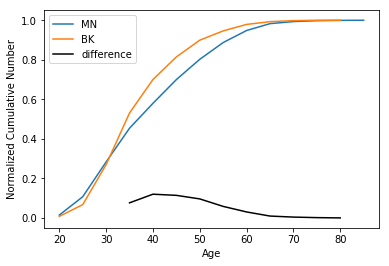

In [131]:
csM=df2.ageMN.groupby(pd.cut(df2.ageMN, bins)).agg([count_nonzero]).cumsum()

csB=df2.ageBK.groupby(pd.cut(df2.ageBK, bins)).agg([count_nonzero]).cumsum() 

print (np.abs(csM / csM.max()-csB / csB.max()))

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "MN")
pl.plot(bins[:-1] + 5, csB / csB.max(), label = "BK")
pl.plot(bins[:-1] + 5, np.sqrt(csB / csB.max() - csM / csM.max())**2, 'k-',
        label = "difference")
pl.xlabel("Age")
pl.ylabel("Normalized Cumulative Number")
pl.legend() 

### Figure 8: the cumulative distribution of CitiBike riders' age durations by start borough

## 2.1 K-S Test

In [76]:
ks = scipy.stats.ks_2samp(df2.ageMN, df2.ageBK)
print (ks)

(0.72219242531169137, 0.0)


### Discussion:

statistic = 0.7222

p-value = 0.0

Result: We can reject the null hypothesis since the p-value is below critical value 0.05.

## 2.2 Redo the KS test with reducted dataset (a subset 200 times smaller)

In [77]:
df2_sub = df2.sample(n=int(len(df2)/200),random_state=500)
len(df2_sub)

531

In [78]:
ks = scipy.stats.ks_2samp(df2_sub.ageMN, df2_sub.ageBK)
print (ks)

(0.71751412429378525, 5.2774026319537087e-121)


In [81]:
len(df2['ageMN'].dropna())

91513

In [82]:
len(df2['ageBK'].dropna())

14762

### Discussion:

statistic = 0.7175

p-value = 5.2774026319537087e-121

Result: We can reject the null hypothesis since the p-value is below critical value 0.05.




### ===Retest using a test for correlation.===

### Null Hypothesis: There is no correlation between age of riders in Manhattan and age of riders in Brooklyn

### Significance Level: $\alpha = 0.05$

### Subsampling the data:

In [84]:
np.random.seed(500)

df2_sub_M = np.random.choice(df2['ageMN'].dropna(),size=df2['ageBK'].dropna().count())
df2_sub_B = df2['ageBK'].dropna()

df2_sub = pd.DataFrame([df2_sub_M,df2_sub_B]).T

df2_sub.columns = ['ageMN','ageBK']

df2_sub['ageMN'] = df2_sub['ageMN'].sort_values().values
df2_sub['ageBK'] = df2_sub['ageBK'].sort_values().values

df2_sub.head()

,ageMN,ageBK
0,16.0,16.0
1,16.0,16.0
2,16.0,17.0
3,16.0,18.0
4,16.0,18.0


In [85]:
df2_sub.describe()

,ageMN,ageBK
count,14762.000000,14762.00000
mean,39.247527,36.96010
std,11.950691,9.53813
min,16.000000,16.00000
25%,30.000000,30.00000
50%,37.000000,35.00000
75%,48.000000,43.00000
max,116.000000,115.00000


## 2.3 Pearson's test

In [87]:
pr = scipy.stats.pearsonr(df2_sub.ageMN,df2_sub.ageBK)
print(pr)

(0.99158435906736775, 0.0)


### Discussion:

Pearson's correlation coefficient = 0.9916

the p-value = 0.0

Result: The null hypothesis is rejected because the p-value is less than 0.05.


## 2.4 Spearman's test

In [89]:
sr = scipy.stats.spearmanr(df2_sub.ageMN, df2_sub.ageBK)
print(sr)

(0.99908020460103764, 0.0)


### Discussion:

Spearman's correlation coefficient = 0.99908020460103764

the p-value = 0.0

Result: The null hypothesis is rejected because the p-value is less than 0.05.